
#### Teoría de Circuitos II

#  Tarea Semanal 4
#### Autor: Federico Rodriguez Vizzon
<img src="./ned.jpeg" align="left" width="150" /> 


## Transformacion de plantilla pasa alto a pasa bajos

Partimos de la siguiennte plantilla de diseño:

<img src="./plantilla_pasa_alto.png" align="left" width="400" /> 



$\omega_s = 2\pi f_s = 2\pi10K$

$\omega_p = 2\pi f_p = 2\pi40K$

Normalizando por $\omega_p$ obtenemos $\omega_p^* = 1$ y $\omega_s^* = \frac{1}{4}$

Ahora transformamos a la plantilla pasa bajos y tenemos:

$\Omega_p = \frac{1}{\omega_p^*} = 1$

$\Omega_s = \frac{1}{\omega_s^*} = 4$

De esta forma llegamos a la plantilla pasa bajos.

<img src="./plantilla_lp.jpg" align="left" width="400" /> 

### Calculo $\epsilon$ y $n$

$\epsilon^2 = 10^{\frac{1}{10}} -1$

$\alpha = 10\times\log{\left(1 + \epsilon^2\Omega^{2n}\right)}$

In [70]:
import numpy as np

Ws = 4
Wp = 1
alpha_max = 1
alpha_min = 40

ee = (10**(1/10)) -1
e = np.sqrt(ee)
print("e^2: ", ee, "\ne: ",e)

print("calculo de la atenuacion en forma iterativa para W = Wp = 4 hasta el orden 4")

for order in range(1, 5):
    alpha = 10*np.log10(1+(ee*(Ws)**(2*order)))
    print("order: ", order, "alpha: ", alpha)

e^2:  0.2589254117941673 
e:  0.5088471399095875
calculo de la atenuacion en forma iterativa para W = Wp = 4 hasta el orden 4
order:  1 alpha:  7.1120019162871175
order:  2 alpha:  18.279176462689875
order:  3 alpha:  30.259439266746135
order:  4 alpha:  42.2968019899089


$n = 3 \implies \alpha = 30.25dB$ Este valor  cumple con la plantilla de diseño 

$\alpha_{max} = 1dB$

$\alpha_{min} = 30dB$ 

## Obtencion de la funcion transferencia

$T(j\Omega) = \frac{1}{1+\epsilon^2\Omega^{2n}} = \frac{1}{1+\left(\frac{\Omega}{\epsilon^{\frac{-1}{n}}}\right)^{2n}}$

Definimos $\Omega_B = \epsilon^{\frac{-1}{n}}$ y asi nos queda:

$T(j\Omega) = \frac{1}{1+\Omega^{2n}}$

Ahora nos quedo la expresion de una funcion transferencia que responde a Butterworth

$T(s) = T_1(s)T_2(s) = \frac{1}{s+1}\frac{1}{s^2 + s2\cos{\theta_1} + 1} $

$\theta_1 = \frac{\pi}{n} = \frac{\pi}{3}$

In [71]:
omega_butter = e**(-1/4)
print("\nOmega_butter =", omega_butter)
a = 2*np.cos(np.pi*(1/3))
q_1 = 1/a
print("\n1/Q1 = ", a, "Q1 = ", q_1)



Omega_butter = 1.184003988964071

1/Q1 =  1.0000000000000002 Q1 =  0.9999999999999998


$T(s) = \frac{1}{s+1}\frac{1}{s^2 + s1 + 1} $

Desnormalizamos con $s = \frac{s}{\Omega_B}$ para obtener la transferencia de maxima planicidad.

$T(\frac{s}{\Omega_B}) = \frac{1}{\frac{s}{\Omega_B}+1}\frac{1}{\left(\frac{s}{\Omega_B}\right)^2 + \frac{s}{\Omega_B} + 1}  = \frac{\Omega_B}{s+\Omega_B} \times \frac{\Omega_B^2}{s^2 + s\Omega_b + \Omega_B^2}$


In [72]:
den_lp_1 = np.array([1, omega_butter])
den_lp_2 = np.array([1, omega_butter, omega_butter**2])
print(np.abs(np.roots(den_lp_1)))
print(np.abs(np.roots(den_lp_2)))

[1.18400399]
[1.18400399 1.18400399]


Calculamos el modulo de las raices de $T_1(s)$ y $T_2(s)$ luego de desnormalizarlo para obtner un filtro de maxima planicidad, estas raices se encuentran en un circulo de radio 1.18

<img src="./roots_lp_maxima_planicidad.jpg" align="left" width="400" /> 

Aplicamos el nucleo de transformacion $s = \frac{1}{s}$ para obtener un filtro pasa altos.

$T(\frac{1}{s}) = \frac{\Omega_B}{\frac{1}{s} + \Omega_B} \frac{\Omega_B^2}{\frac{1}{s^2} + \frac{\Omega_B}{s} + \Omega_B^2} = \frac{s\Omega_B}{1 + s\Omega_B} \frac{s^2\Omega_B^2}{1 + s\Omega_B + s^2\Omega_B^2} = \frac{s}{s + \frac{1}{\Omega_B}} \frac{s^2}{s^2 + s\frac{1}{\Omega_B} + \frac{1}{\Omega_B^2}}$

Finalmente:

$T_1(s) = \frac{s}{s + \frac{1}{\Omega_B}}$

$T_2(s) = \frac{s^2}{s^2 + s\frac{1}{\Omega_B} + \frac{1}{\Omega_B^2}}$

In [73]:
den_hp_1 = np.array([1, 1/omega_butter])
den_hp_2 = np.array([1, 1/omega_butter, 1/omega_butter**2])
print(np.abs(np.roots(den_hp_1)))
print(np.abs(np.roots(den_hp_2)))

[0.84459175]
[0.84459175 0.84459175]


Repetimos el calculo de la ubicacion de los polos de $T_{1,2}(s)$ pero ahora para el filtro pasa altos.

Los polos se encuentran en un circulo de radio $\frac{1}{\Omega_B} = 0.84$

<img src="./roots_hp_maxima_planicidad.jpg" align="left" width="400" /> 

## Fe de erratas: Los ceros en el origen son 3 y NO 2

## Implementacion con redes pasivas

### Etapa pasa altos de orden 1

   <img src="./hp_1_sch.png" align="left" width="400" /> 

$T(s) = \frac{s}{s + \frac{1}{R_1C_1}}$

$T_1(s) = \frac{s}{s + \frac{1}{\Omega_B}}$

$\frac{1}{RC} = \frac{1}{\Omega_B}$

Si $C = 1 \implies R_1 = \Omega_B$  

### Etapa pasa altos de orden 2

<img src="./hp_2_sch.png" align="left" width="400" /> 

$T(s) = \frac{s^2}{s^2 + s\frac{R_2}{L_2} + \frac{1}{L_2C_2}}$

$T_2(s) = \frac{s^2}{s^2 + s\frac{1}{\Omega_B} + \frac{1}{\Omega_B^2}}$

$\frac{R_2}{L_2} = \frac{1}{\Omega_B} \land \frac{1}{L_2C_2} = \frac{1}{\Omega_B^2}$ 

Adoptamos $L_2 =1$

$R_2 = \frac{1}{\Omega_B}$

$C_2 = \Omega_B^2$

In [74]:
c_1 = 1
r_1 = omega_butter

l_2 = 1
c_2 = omega_butter**2
r_2 = 1/omega_butter

print("\nCalculo de los componentes de la red normalizada\n")
print("R1 =", r_1, "\nC1 =", c_1)
print("R2 =", r_2, "\nL2 =", l_2, "\nC2 =", c_2)


Calculo de los componentes de la red normalizada

R1 = 1.184003988964071 
C1 = 1
R2 = 0.8445917491164342 
L2 = 1 
C2 = 1.401865445882832


In [75]:
import numpy as np
from scipy import signal as sig
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

In [76]:

import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento

plt.figure(1)
plt.close(1)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# Podés modificar el ancho y alto de los gráficos que generás
fig_sz_x = 14
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})


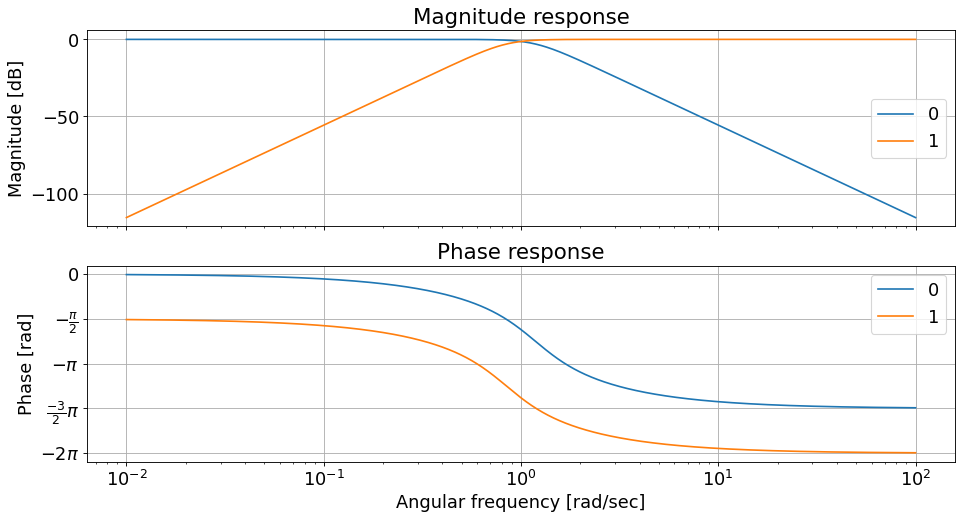

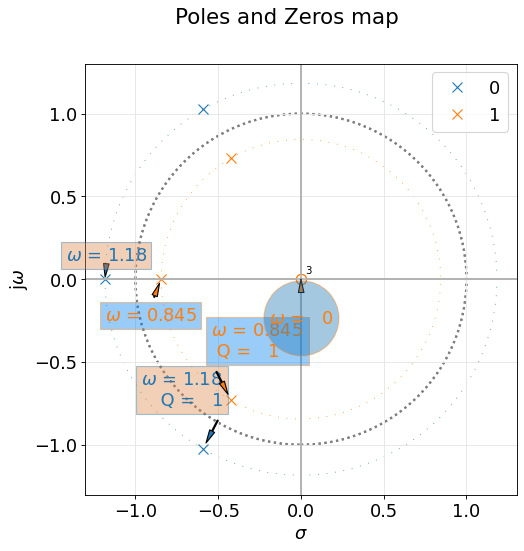

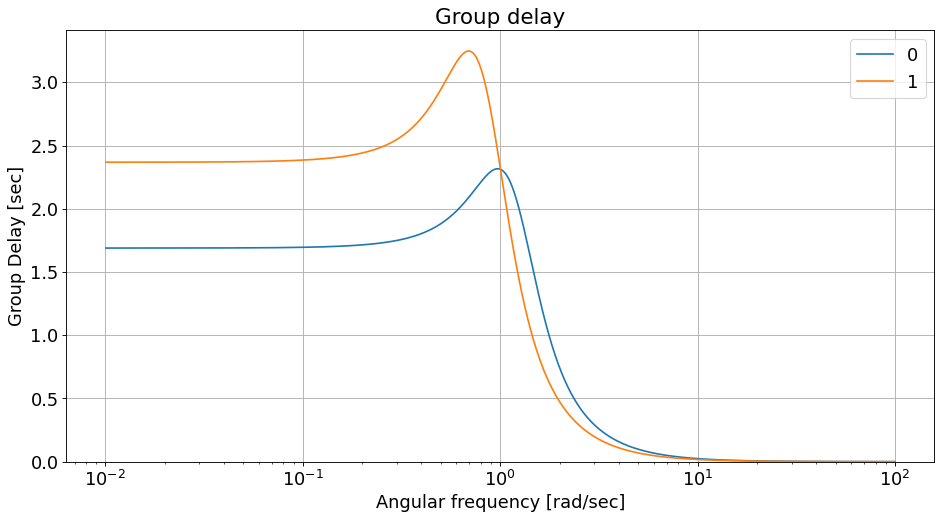

In [77]:
     
# Definimos los parámetros de la simulación

# Probar diferentes valores de Q
#################################
# Cargamos la funcion transferencia como vectores de sus coeficientes.

z, p, k = sig.buttap(3)
num_butter, den_butter = sig.zpk2tf(z, p, k)
num_max_plan, den_max_plan = sig.lp2lp(num_butter, den_butter, omega_butter)
num_hp, den_hp = sig.lp2hp(num_max_plan, den_max_plan)
tf_butter = sig.TransferFunction(num_butter, den_butter)
tf_max_plan = sig.TransferFunction(num_max_plan, den_max_plan)
tf_hp = sig.TransferFunction(num_hp, den_hp)

analyze_sys([tf_max_plan, tf_hp])

## Simulacion circuital

<img src="./ts4_hp_sch.png" align="left" width="900" /> 

<img src="./ts4_ac_plot.png" align="left" width="900" /> 


## Cicuito propuesto con GIC

<img src="./ts4_gic_sch.png" align="left" width="900" /> 

<img src="./ts4_gic_ac_plot.png" align="left" width="900" /> 